# Assignment 2

***

## Question 1: Neural Codes & Nearest Neighbor retrieval (7.5pt)
The Caltech101 dataset consists of images of 101 different objects. In this question you will develop an image retrieval system using image representations (neural codes) learned with a deep convolutional neural network and a given distance metric.

In the tasks below you will need to implement the following steps:

* Retrieval for $n$ selected (distinct) query images from the dataset
    * For each query image, obtain the 5 most similar images (excluding the query image itself!)
* Evaluation of the quality of the retrieval 
    * The Caltech101 images are annotated with their object class. Use these annotations to evaluate the accuracy of the retrieval task.
    * For each query image, count the number of images whose class corresponds to the one from the query. The score of the retrieval for that image then ranges between:
        * **5** *all* retrieved images' classes agree with the query image class
        * **0** *none* of the images' classes agree with the query image class
    * Compute the average of all $n$ queries

***

### Task 1.1:  Neural codes image retrieval
**a)** Implement the retrieval task and evaluate the results for $n=200$ images. Use the provided VGG16 network pre-trained on ImageNet to compute "neural codes" and L2-distance. Specifically use the codes produces by the following layers of the model: 
1. the "fc1"-layer
2. the "fc2"-layer

Provide the retrieval evaluation scores for both tasks.

In [11]:
# you'll need these imports:
from sklearn.neighbors import NearestNeighbors
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
# NOTE: you will first need to apply some changes to "Practical-3.3.0_preprocess-caltech101.ipynb" and run it
#       to obtain a pickle file with "fc1"-features. You don't need to show these changes here.


# make random selection of n query images/indices, the same for all experiments
n = 200
n_examples = 8677  # the dataset has 8677 images
indices = np.random.choice(range(n_examples), size=n, replace=False)

# iterate over two data representations (make sure these two files exist in the "data" subfolder first)
for datapath in ("caltech101_VGG16_fc1.p", "caltech101_VGG16_fc2.p"):
    # load the dataset
    with open("data\\"+datapath, "rb") as f:
        X_fc, y, X_paths, classes = pickle.load(f)

    # === SOLUTION: ===
    # insert code here
    neigh = NearestNeighbors(n_neighbors=6, p=2) # n_neighbors = 6, because the first one is itself
    neigh.fit(X_fc)

    X = X_fc[indices]
    nn = neigh.kneighbors(X)
    nn  # nn = (distances, indices), nn stores the 6 closest images and their distances for the given 200 indeces
    
    if "caltech101_VGG16_fc1.p" == datapath:
        fc1= (nn, classes, X_fc, y, X_paths)
    else:
        fc2= (nn, classes, X_fc, y, X_paths)

In [7]:
scorefc1, scorefc2 = [],[]

for fctype, fc in [('fc1',fc1),('fc2',fc2)]:
    for collection in fc[0][1]:
        rightClass = fc[1][y[collection[0]]]
        
        score=0
        for item in collection[1:]:
            if fc[1][y[(item)]]==rightClass:
                score=score+1
        if fctype == 'fc1':
            scorefc1.append(score)
        else:
            scorefc2.append(score)
print("Score fc1: " + str(np.mean(scorefc1)/5) )   
print("Score fc2: " + str(np.mean(scorefc2)/5)  )            

Score fc1: 0.727
Score fc2: 0.782


***

**b)** Which representation ("neural code") provided better features for the given retrieval task? 
Justify your answer and discuss possible reasons for the observed results. Relate your answer to the conclusions in the paper "Neural Codes for Image Retrieval".

**Answer:**

The representation provided by the fc2 layer provides the best average score. Both layers fc1 and fc2 have the same shape, but differ in the number of parameters used. fc1 uses 102764554 which is strictly larger (factor 6) than the number of parameters fc2 uses (16781312). As fc2 is the last layer before the output, this layer is more tuned for the classification task than fc1. The fc1 layer might not acquire enough invarieance to nuisance factors and therefore preform less good.  

Based on the paper "Neural Codes for Image Retrieval".

Quote:

We speculate, that this is because the very top layers are too much tuned for
the classification task, while the bottom layers do not acquire enough invariance
to nuisance factors.

***

### Task 1.2: Detailed evaluation
**a)** The retrieval scores can vary from one query image to another. Some images are quite representative and for them retrieval works well, some are not so much.
For the same retrieval task given above using "fc2"-features, find (if possible) six query images such that they range from excellent to poor retrieval performance. More specifically find example query images that result in query scores of exactly 0, 1, 2, 3, 4, and 5.

Visualise the six (or less) resulting query images.

In [5]:
# you'll need these extra imports:
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

In all cases the most left image is the actual image and the five on right are the closest neighbours.
Class: pigeon
Score: 0


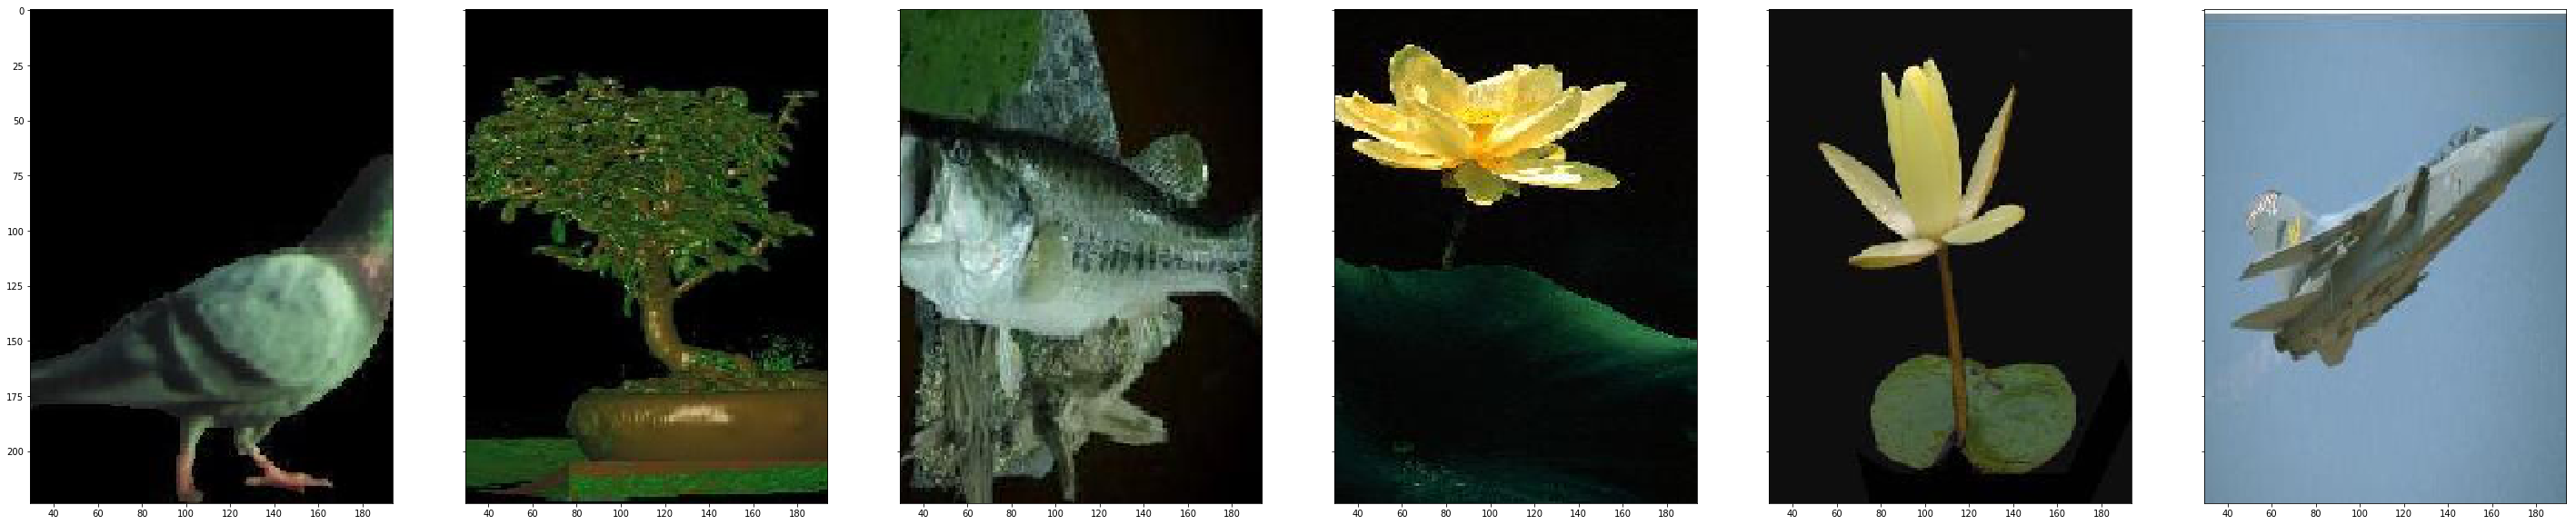

Class: scorpion
Score: 1


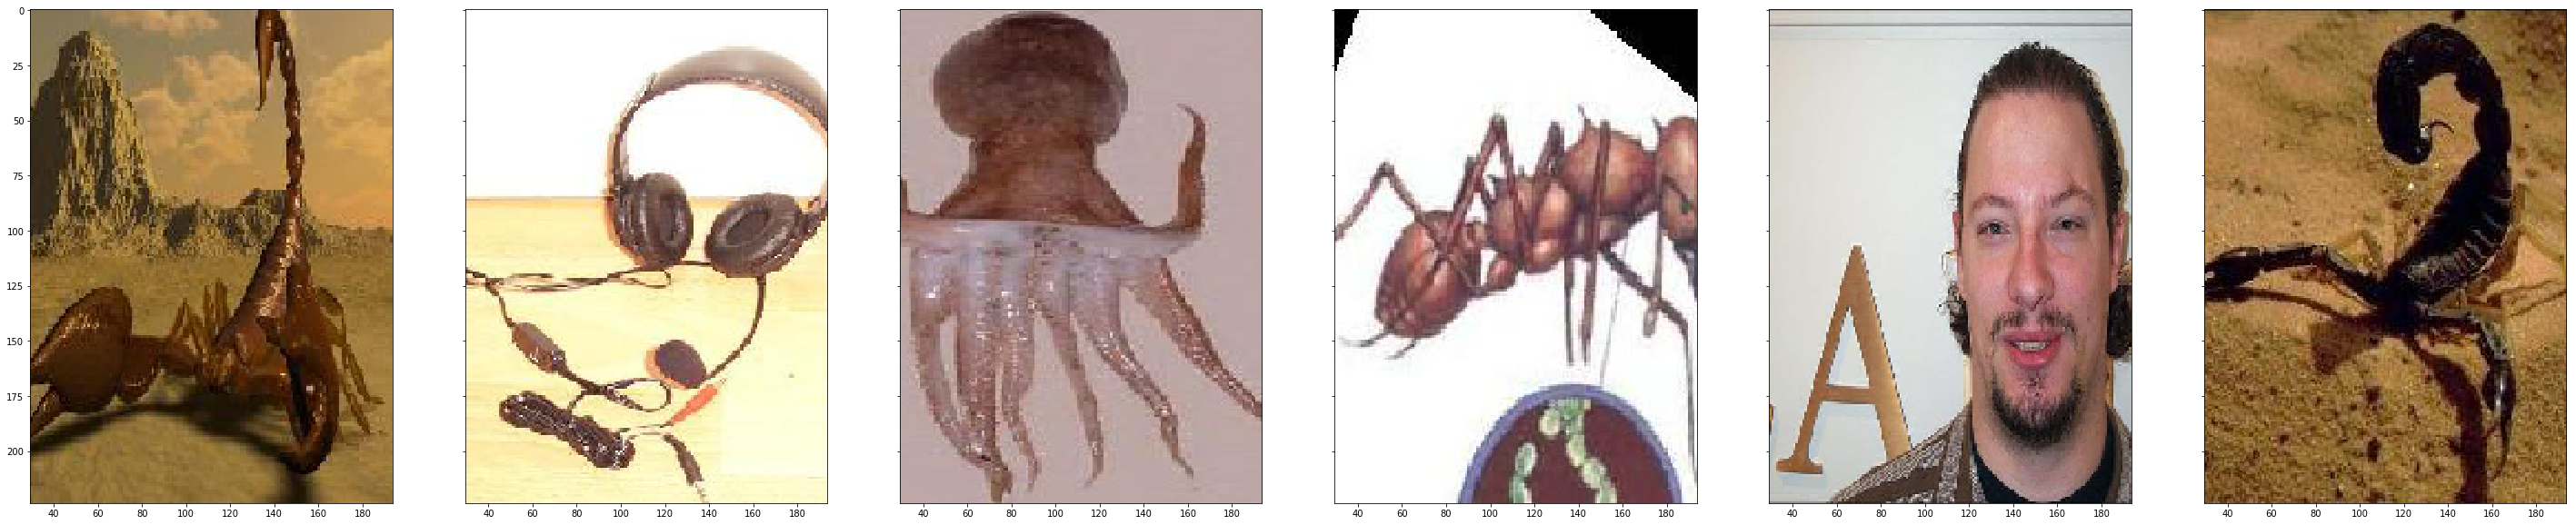

Class: umbrella
Score: 2


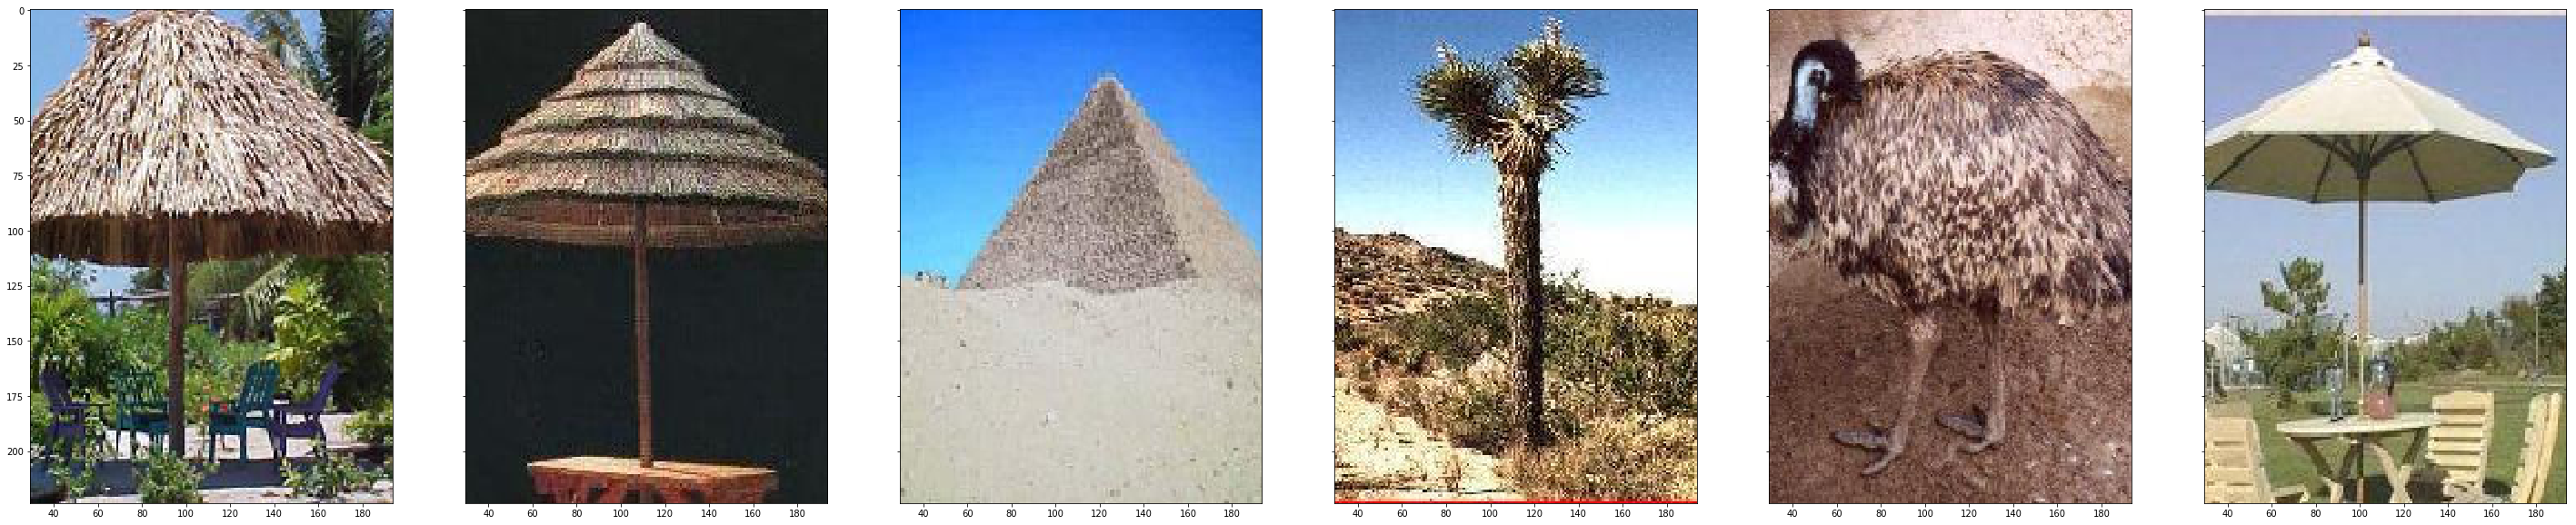

Class: umbrella
Score: 3


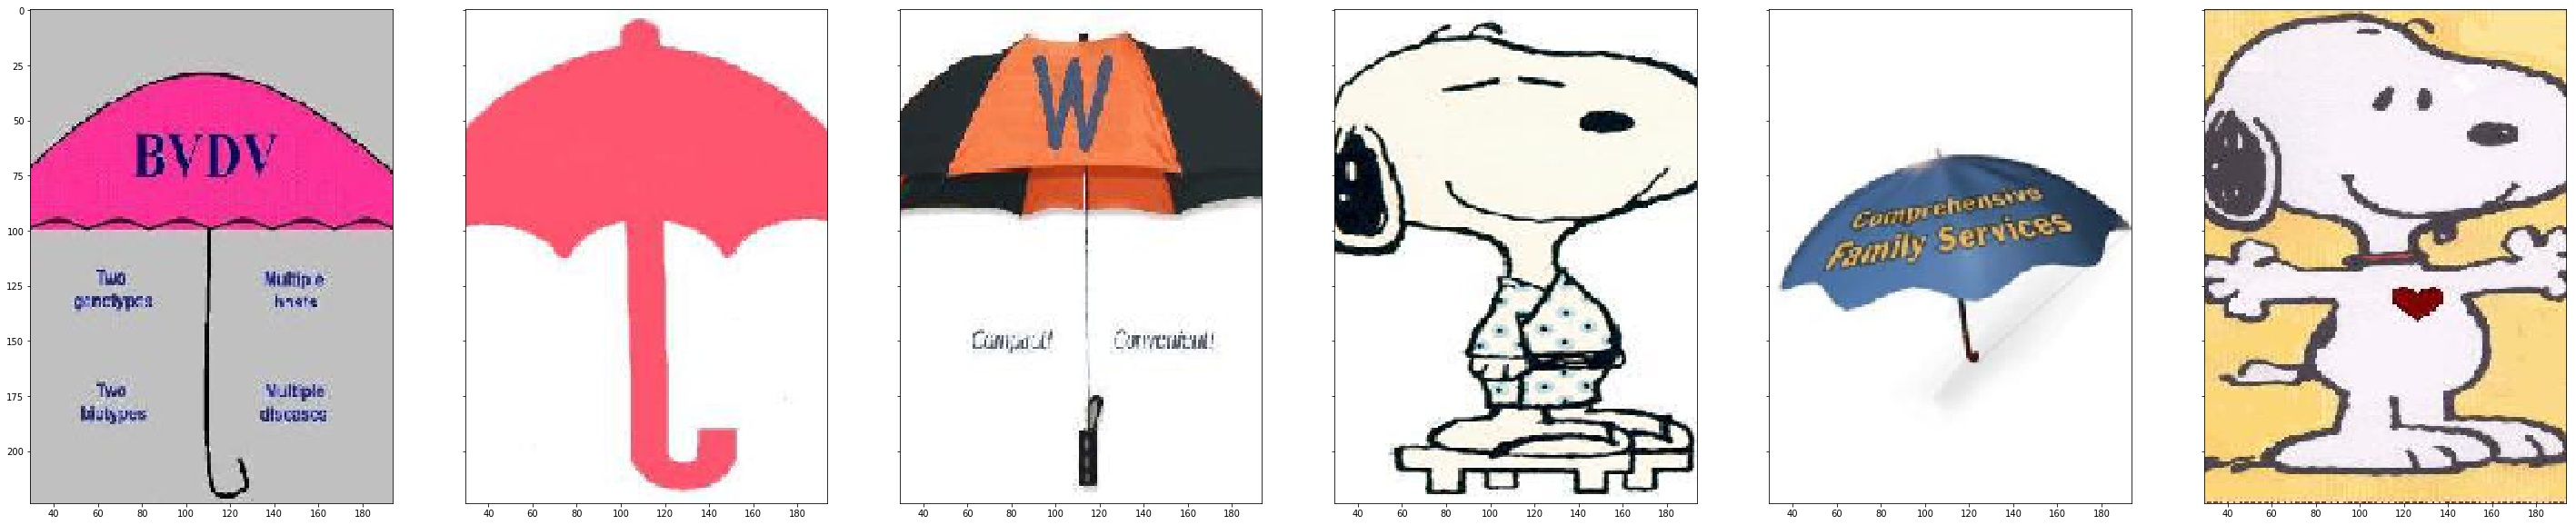

Class: ewer
Score: 4


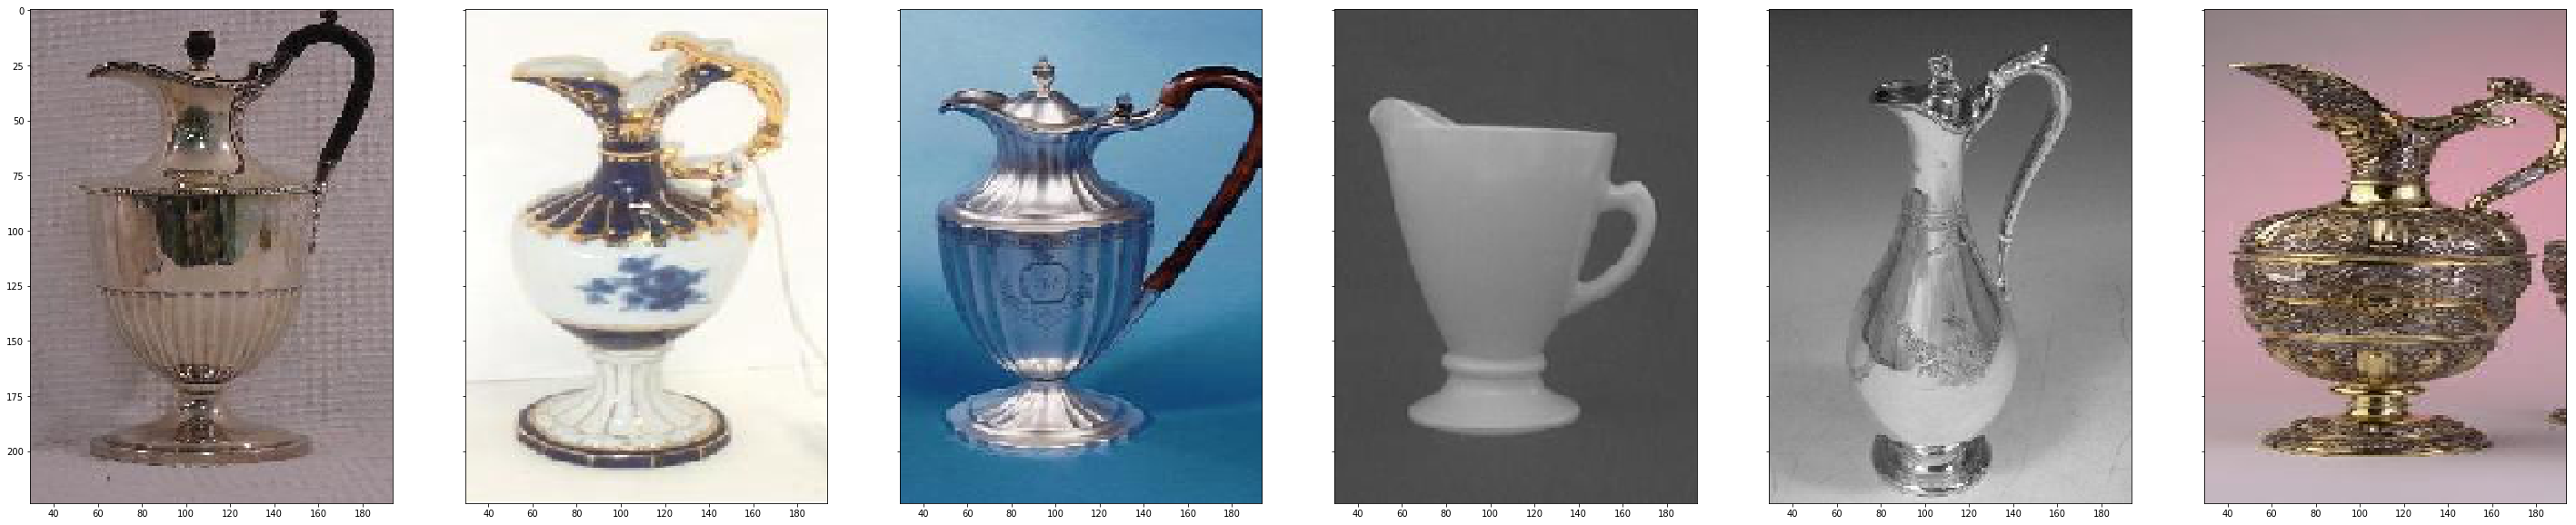

Class: garfield
Score: 5


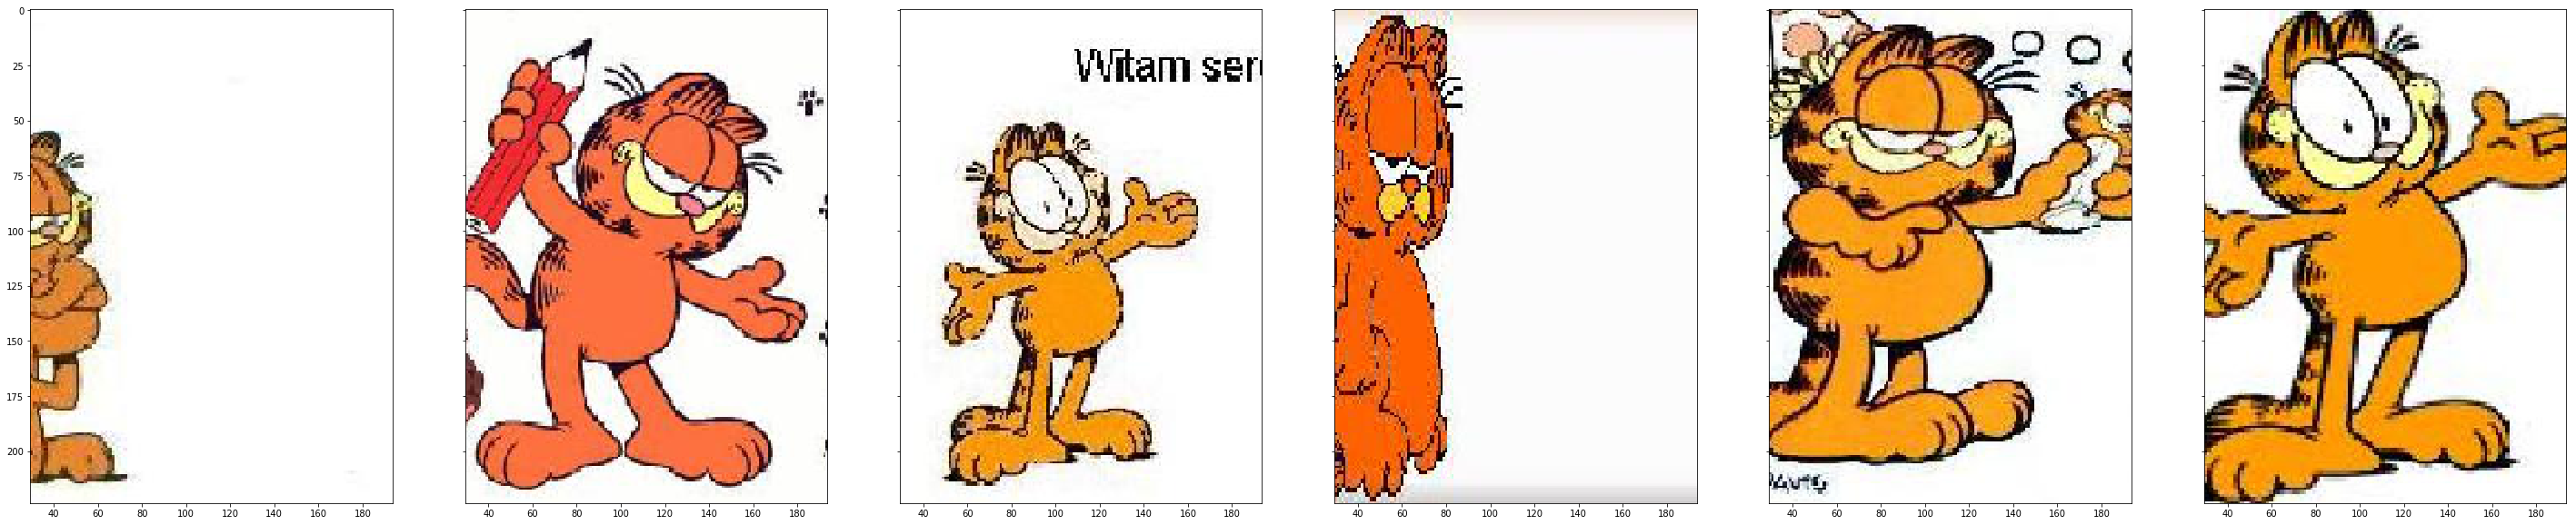

In [35]:
# load the dataset
datapath = "caltech101_VGG16_fc2.p"
with open(os.path.join("data", datapath), "rb") as f:
    X_fc, y, X_paths, classes = pickle.load(f)
    

# you can use this simple function to visualise an image, given a filepath
def show_img(filepath):
    img = image.load_img(filepath, target_size=(224,224))
    plt.imshow(img)
    plt.axis("off")
    plt.show()
# example usage given some index < 8677:
#index = 254
#show_img(X_paths[index])

def show_col(collection):
    f, axes = plt.subplots(1, 6, sharey=True, figsize=(50,10))
    imgvec = []
    filepaths = []
    for img in collection:
        filepaths.append(X_paths[img])
    for filepath in filepaths:
        imgvec.append(image.load_img(filepath, target_size=(224,224)))
    for i, ax in enumerate(axes.flat):
        ax.imshow(imgvec[i])
    plt.show()
    
# === SOLUTION: ===
neigh = NearestNeighbors(n_neighbors=6, p=2) # n_neighbors = 6, because the first one is itself
neigh.fit(X_fc)

X = X_fc[indices]
nn = neigh.kneighbors(X)
score_0 = []
score_1 = []
score_2 = []
score_3 = []
score_4 = []
score_5 = []
score_fc2 = []

for collection in nn[1]:
    rightClass = classes[y[collection[0]]]
    score=0
    
    for item in collection[1:]:
        if classes[y[(item)]]==rightClass:
            score=score+1
                
    scorefc2.append(score)
    if score == 0:
        score_0.append(collection)
    if score == 1:
        score_1.append(collection)
    if score == 2:
        score_2.append(collection)
    if score == 3:
        score_3.append(collection)
    if score == 4:
        score_4.append(collection)
    if score == 5:
        score_5.append(collection)

scores = [score_0,score_1,score_2,score_3,score_4,score_5]
print("In all cases the most left image is the actual image and the five on right are the closest neighbours.")
for i, score in enumerate(scores):
    print("Class:", classes[y[score[0][0]]])
    print("Score: {}".format(i))
    show_col(score[0])
        



In [73]:
scorefc2 = []

for fctype, fc in [('fc2',fc2)]:
    for collection in fc[0][1]:
        rightClass = fc[1][y[collection[0]]]
        
        score=0
        for item in collection[1:]:
            if fc[1][y[(item)]]==rightClass:
                score=score+1
                
        scorefc2.append(score)
print("Score fc2: " + str(np.mean(scorefc2)/5)  )  

Score fc2: 0.782


***

**b)** Looking at the results, what can you say about the "types" of images that obtain good retrieval scores compared to those obtaining poor retrieval scores? Give an explanation and possible solution(s).

(*HINT: How did we obtain data representations for similarity measures?*)

**Answer:**

We obtained data representationts for similarity measures by getting the neural code features from the fc2 layer. 
Images that have a very specific shape have good scores, like a piano, scissors and uniquely shaped animals. Images that score bad have simular shape and most of the time a background with a solid color (only white / brown / red). In these cases we think the network is more learning on the background instead of the object in the image.

***

### Task 1.3: Subjective evaluation
We will now use the "fc2"-features to do image retrieval for query images from the "BACKGROUND_Google" set from the Caltech101 dataset. These images are not associated to a particular class, so we will evaluate them subjectively instead.

**a)** Find two query images from the "BACKGROUND_Google" class, such that for the first query image relevant/similar images are retrieved (according to your own definition of relevancy/similarity), and for the second image mainly irrelevant/dissimilar images are retrieved. For each of them, visualise its 5 nearest neighbors in the Caltech101 dataset (*so do NOT retrieve images from the "BACKGROUND_Google" class!*), according to the "fc2-features" and L2-distance.

Background 1:


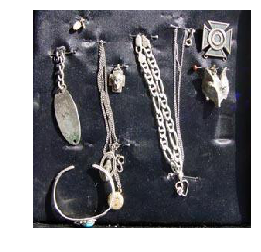

Closest neighbours to background 1


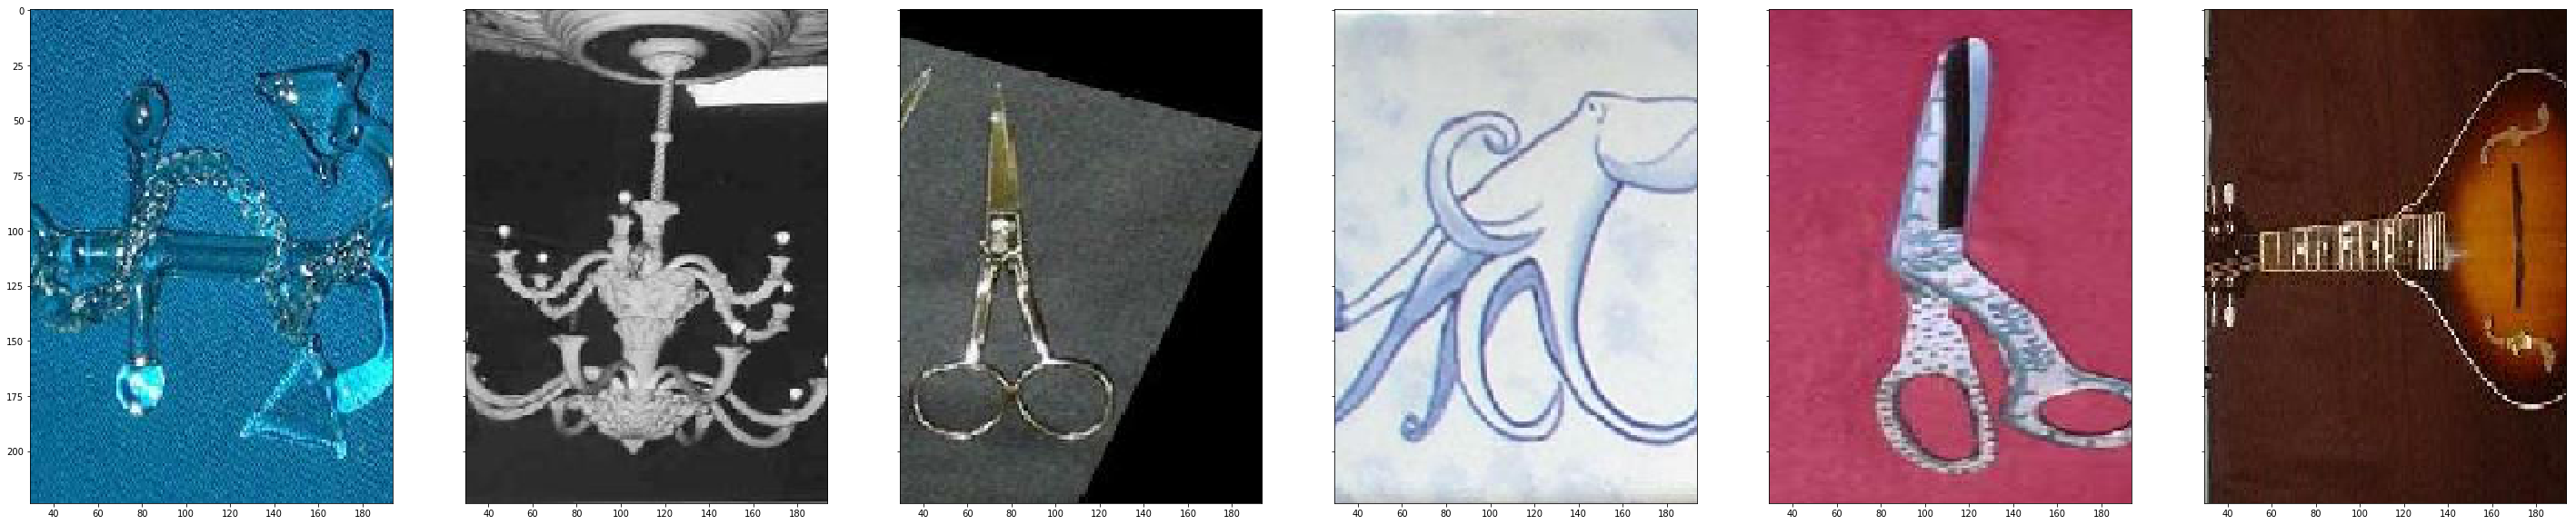

Background 2:


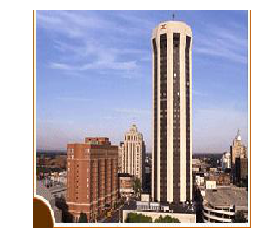

Closest neighbours to background 1


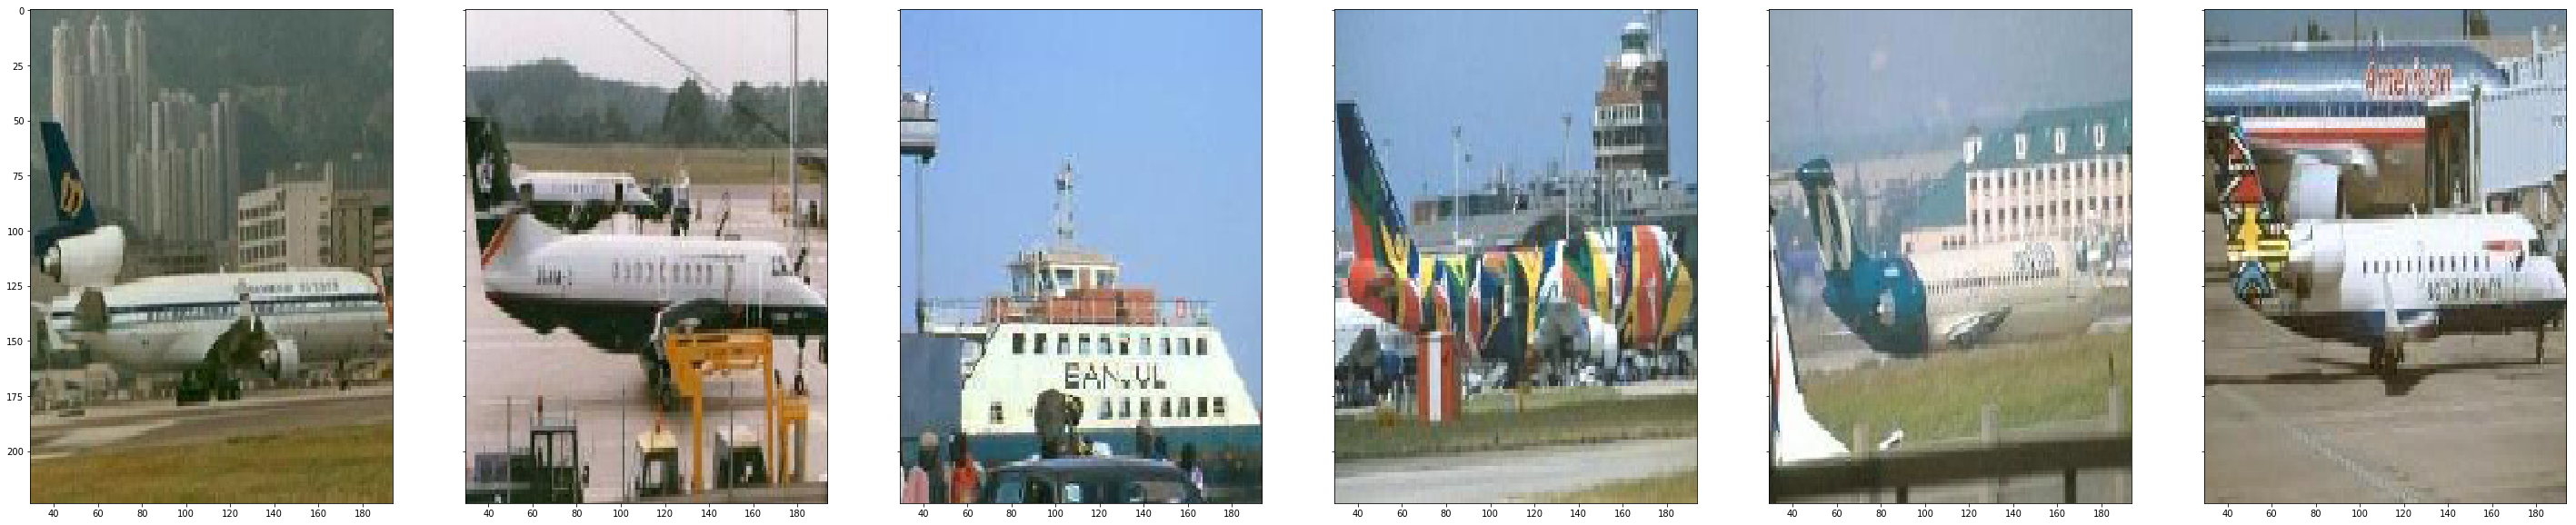

In [71]:
# load the BACKGROUND_Google set
with open(os.path.join("data","caltech101_VGG16_fc2_bg.p"), "rb") as f:
    bg_fc2, bg_paths = pickle.load(f)
    
datapath = "caltech101_VGG16_fc2.p"
with open(os.path.join("data", datapath), "rb") as f:
    X_fc, y, X_paths, classes = pickle.load(f)

# === SOLUTION: ===
bg_one = (bg_fc2[35], bg_paths[35])
bg_two = (bg_fc2[44], bg_paths[44])
print("Background 1:")
show_img(bg_one[1])

neigh = NearestNeighbors(n_neighbors=6, p=2) # n_neighbors = 6, because the first one is itself
neigh.fit(X_fc)
X = bg_one[0].reshape(1, -1)
nn = neigh.kneighbors(X)

for index in nn[1]:
    print("Closest neighbours to background 1")
    show_col(index)
    
print("Background 2:")    
show_img(bg_two[1])
neigh = NearestNeighbors(n_neighbors=6, p=2) # n_neighbors = 6, because the first one is itself
neigh.fit(X_fc)
X = bg_two[0].reshape(1, -1)
nn = neigh.kneighbors(X)

for index in nn[1]:
    print("Closest neighbours to background 1")
    show_col(index)
  

***

**b)** Motivate your idea of "relevance": why do you consider the results for the first image relevant/similar, and those for the second image irrelevant/dissimilar?

**Answer:**

Our first background google image contains several metal objects, such as chains, necklaces and a bracelet.  We consider the retrieved images similar, as 5 out of 6 images return with metal parts/objects. The scissors being totally metal, the chandelier being attached by a metal chain to the ceiling, the anchor having a metal chain attached to it, and the guitar having metal wires. 

The second  background google image could be classified as a city skyline, consisting of a skyscraper and several buildings. The retreived images do have 3 out of 6 times buidlings or parts in them. However, looking at the contents of the retrieved images (5/6 airplaines), you would assume the input image consists of an airplane. It seems the windows in the airplanes and ferry of the retrieved images were wrongly matched with the windows of our input buildings.

***

**c)** Explain why you think this retrieval method (nearest neighbor for neural codes from VGG16) performs better on the first image than on the second.

**Answer:**

The background google images which we are retrieving with, do not fit in any class of the Caltech101 data. The images we will be retrieving from will already belong to one class, thus our retrieved images may only match partly.

Our first image contains several metal objects. We have in our Caltech101 data the class scissors, which contains metal scissors, thus these images already match partly.

There is however no class concerning buildings or cities, thus our second image of the city skyline will be matching with more random classes. In our case we have an airplane class. The airplains having a confusingly similar property of 'windows', which cause a wrong match.

Thus it seems the nearest neighbor for neural codes from VGG16 performs better for the first images as we want to match by details. The second image wrongly matches, as we want the overal image to match, not just the details.

***

### Task 1.4: Dimensionality reduction

**a)** So far we've been using 4096-dimensional neural codes. This space is however still quite high-dimensional. Apply a dimensionality reduction method and evaluate the effect on the retrieval performance.

* Use PCA to obtain lower-dimensional representations of the Caltech101 data "fc2"-features (try the same compression rates as in Table 2 of the "Neural Codes for Image Retrieval" paper).
* Evaluate the same retrieval task as explained at the start of this question for each of the compression rates/dimensionalities. Report the retrieval scores.

*HINT: See http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html on how to transform a dataset with PCA.*

In [4]:
# import PCA from scikit-learn
from sklearn.decomposition import PCA
from random import randint

In [8]:
# load the data
X_fc,y,X_paths, classes= None,None,None,None
datapath = "caltech101_VGG16_fc2.p"
with open("data/"+datapath, "rb") as f:
    X_fc, y, X_paths, classes = pickle.load(f)
    
# make random selection of n query images/indices, the same for all experiments
n = 200
n_examples = 8677  # the dataset has 8677 images
indices = np.random.choice(range(n_examples), size=n, replace=False)
allindices = [x for x in range(8677)]
print(X_fc.shape)

# === SOLUTION: ===
dimensions = [16,32,64,128,256,512]
X = X_fc[allindices]
print(X.shape)
for dim in dimensions:
    scorefc2 = []
    pca = PCA(n_components=dim)
    X_pca = pca.fit_transform(X)
    print(X_pca.shape)

    
    neigh = NearestNeighbors(n_neighbors=6, p=2) # n_neighbors = 6, because the first one is itself
    neigh.fit(X_pca)

    nn = neigh.kneighbors(X_pca)
    score_0 = []
    score_1 = []
    score_2 = []
    score_3 = []
    score_4 = []
    score_5 = []

    for collection in nn[1]:
        rightClass = classes[y[collection[0]]]
        score=0

        for item in collection[1:]:
            if classes[y[(item)]]==rightClass:
                score=score+1

        scorefc2.append(score)
        if score == 0:
            score_0.append(collection)
        if score == 1:
            score_1.append(collection)
        if score == 2:
            score_2.append(collection)
        if score == 3:
            score_3.append(collection)
        if score == 4:
            score_4.append(collection)
        if score == 5:
            score_5.append(collection)


    for fctype, fc in [('fc2',fc2)]:
        for collection in fc[0][1]:
            rightClass = fc[1][y[collection[0]]]

            score=0
            for item in collection[1:]:
                if fc[1][y[(item)]]==rightClass:
                    score=score+1

            scorefc2.append(score)
    print("Dimention: {}".format(dim))
    print("Score fc2: " + str(np.mean(scorefc2)/5)  )  


(8677, 4096)
(8677, 4096)
(8677, 16)
Dimention: 16
Score fc2: 0.7304720063084376
(8677, 32)
Dimention: 32
Score fc2: 0.7941872254139912
(8677, 64)
Dimention: 64
Score fc2: 0.8219668807029402
(8677, 128)
Dimention: 128
Score fc2: 0.8238819420975554
(8677, 256)
Dimention: 256
Score fc2: 0.8220344711051031
(8677, 512)
Dimention: 512
Score fc2: 0.8153204911569224


***

**b)** Discuss your results: how much can you further reduce the dimensionality of the data representations, without affecting the retrieval performance (much)? Compare these results to those from the paper, are your conclusions similar or not?

**Answer:**

We can reduce the dimensionality of the data representations down to 64, while maintaining a retrieval score of around 0,82. Decreasing to 32 dimensions, has the score go down 3%. Decreasing further to 16 dimensions, causes a 8% score drop.

In the paper the score remains stable down to 256 dimenions, in our case we are able reduce down to 64 dimensions. This difference can be in party due to the different number of images used, and the different image contents. The paper uses a landmark dataset, which seems more specialized thus containing harder to distinguish images, compared to our dataset.

***

## Question 2: Fashion-MNIST (12.5pt)
For this question we will work with the "Fashion-MNIST" dataset. This dataset is modelled to have the same specifics as MNIST; it consists of a training set of 60,000 examples, and a test set of 10,000 examples. Each example is a 28x28 greyscale image, associated with a label from one of 10 classes. The images represent various clothing items (as opposed to handwritten digits for MNIST), each class represents a different type of clothing item. The following classes exist:
* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

In this question we will investigate various ways to model visual similarity for this dataset, in order to perform image retrieval. For more info about the dataset, see https://github.com/zalandoresearch/fashion-mnist.

The dataset can directly be obtained through Keras:

X_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
X_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


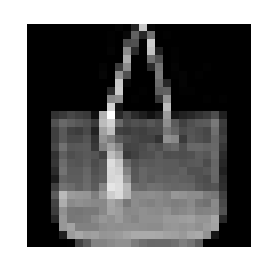

Class: Bag (8)


In [12]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras import backend as K

# load the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# properties of the data
img_rows, img_cols, chns = 28, 28, 1
n_classes = 10

# reshape
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], chns, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], chns, img_rows, img_cols)
    input_shape = (chns, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, chns)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, chns)
    input_shape = (img_rows, img_cols, chns)

# normalise
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

# transform labels to one-hot encoding, but also keep original single-digit encoding
y_train_digits = y_train
y_test_digits = y_test
y_train = to_categorical(y_train_digits, n_classes)
y_test = to_categorical(y_test_digits, n_classes)

print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# show an example
example_id = 35  # pick any integer from 0 to 59999 to visualize a training example
example = x_train[example_id].reshape(img_rows, img_cols)
label = y_train[example_id]
label_digit = y_train_digits[example_id]
label_class = classes[label_digit]
plt.matshow(example, cmap="gray")
plt.axis("off")
plt.show()
print("Class: {} ({})".format(label_class, label_digit))

Consider the following situation: We have a fully labelled dataset (the ***labelled set***) of the images from the first 5 classes (t-shirts/tops, trousers, pullovers, dresses, coats). We are then supplied with an unlabelled dataset (the ***retrieval set***) containing the remaining Fashion-MNIST images (sandals, shirts, sneakers, bags, ankle boots) on which we want to be able to perform image retrieval. So we cannot use labels from the retrieval set, since we do not know them (note that in our case we *do* have the labels, but we will only use them for evaluation).

The following code splits the dataset up into two sets representing 5 classes each. Observe that the labelled and the retrieval set have exactly the same size.

In [13]:
# obtain indices of labelled and retrieval sets
indices_train_l = np.argwhere(y_train_digits < 5).flatten()  # indices labelled training set
indices_train_r = np.argwhere(y_train_digits >= 5).flatten()  # indices retrieval training set
indices_test_l = np.argwhere(y_test_digits < 5).flatten()  # indices labelled test set
indices_test_r = np.argwhere(y_test_digits >= 5).flatten()  # indices retrieval test set

# split up train and test set (images and labels)
x_train_l = x_train[indices_train_l]
x_train_r = x_train[indices_train_r]
y_train_l = y_train[indices_train_l]
y_train_r = y_train[indices_train_r]
y_train_digits_l = y_train_digits[indices_train_l]
y_train_digits_r = y_train_digits[indices_train_r]
x_test_l = x_test[indices_test_l]
x_test_r = x_test[indices_test_r]
y_test_l = y_test[indices_test_l]
y_test_r = y_test[indices_test_r]
y_test_digits_l = y_test_digits[indices_test_l]
y_test_digits_r = y_test_digits[indices_test_r]

# labels are now one-hot encoded 10-dimensional vectors, but only the first or last five dimensions are used
# omit unused dimensions to obtain 5-dimensional one-hot encodings
y_train_l = y_train_l[:, :5]
y_train_r = y_train_r[:, 5:]
y_test_l = y_test_l[:, :5]
y_test_r = y_test_r[:, 5:]
# (note that the dimensions of y_train_l/y_test_l do not correspond to those of y_train_r/y_test_r now)

# print the shapes
print(x_train_l.shape)
print(x_train_r.shape)
print(y_train_l.shape)
print(y_train_r.shape)
print(y_train_digits_l.shape)
print(y_train_digits_r.shape)
print(x_test_l.shape)
print(x_test_r.shape)
print(y_test_l.shape)
print(y_test_r.shape)
print(y_test_digits_l.shape)
print(y_test_digits_r.shape)

(30000, 28, 28, 1)
(30000, 28, 28, 1)
(30000, 5)
(30000, 5)
(30000,)
(30000,)
(5000, 28, 28, 1)
(5000, 28, 28, 1)
(5000, 5)
(5000, 5)
(5000,)
(5000,)


***

### Task 2.1: Fashion neural retrieval
**a)** Design an MLP (multilayer perceptron) for classification on the first 5 classes of the Fashion-MNIST dataset (i.e. only use `x_train_l` for training). You may include Dropout and BatchNormalization if needed. Let the last hidden dense layer (before the 5-dimensional output layer) have 128 dimensions. (*HINT: you can use* `name="neural_codes"` *for this layer to make it easier to obtain features from it later.*)

Train it to classify images into their corresponding classes. Make sure that it achieves decent accuracy (at least 90%) on the labelled test set `x_test_l` (show this!). Save the trained model to a ".h5" file. (make sure you're using Keras version 2.1.3!)

In [14]:
# import sequential model and layers
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D

In [11]:
mlp = Sequential()
dim = (28,28,1)
mlp.add(Dense(32, activation='relu', input_shape= dim))

mlp.add(BatchNormalization())
mlp.add(Dropout(0.5))
mlp.add(Dense(64, activation='relu'))
mlp.add(BatchNormalization())
mlp.add(Dropout(0.5))

mlp.add(Flatten())
mlp.add(Dense(128, activation='relu',name="neural_codes"))
mlp.add(BatchNormalization())
mlp.add(Dropout(0.5))
mlp.add(Dense(5, activation='softmax'))

mlp.summary()

mlp.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

batch_size = 100
epochs = 20

mlp.fit(x_train_l, y_train_l,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=1/12)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 28, 28, 32)        64        
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
dense_5 (Dense)              (None, 28, 28, 64)        2112      
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
dropout_5 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 50176)             0         
__________

In [12]:
# create directory if doesn't exist yet
try:
    os.mkdir("assignment2_models")
except(FileExistsError):
    pass

# save the model
mlp.save(os.path.join("assignment2_models", "mlp_fashionmnist_l.h5"))

***

**b)** Briefly motivate how and why you chose this architecture.

**Answer:**

*=== write your answer here ===*

***

### Task 2.2: Fashion neural retrieval #2
**a)** Design a CNN (convolutional neural network) for classification on the first 5 classes of the Fashion-MNIST dataset (i.e. only use x_train_l for training), consisting of a number of Convolutions with Max-Pooling, followed by one or more Dense layers. You may use Dropout and BatchNormalization to improve generalization and training speed. Let the last hidden dense layer (before the 5-dimensional output layer) have 128 dimensions. (*HINT: you can use* `name="neural_codes"` *for this layer to make it easier to obtain features from it later.*)

Train the CNN to classify images into their corresponding classes. Make sure that it achieves decent accuracy (at least 94%) on the test set `x_test_l` (show this!). Save the trained model to a ".h5" file. (make sure you're using Keras version 2.1.3!)

In [16]:
# import additional layers
from keras.layers import Conv2D, MaxPooling2D

In [17]:
cnn = Sequential()

# === SOLUTION: ===
cnn = Sequential()
28,
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape= (28,28,1)))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))
cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

cnn.add(Flatten())
cnn.add(Dense(128, activation='relu', name="neural_codes"))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))
cnn.add(Dense(5, activation='softmax'))

cnn.summary()

cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
__________

In [19]:
batch_size = 100
epochs = 1

cnn.fit(x_train_l, y_train_l,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.1)

Train on 27000 samples, validate on 3000 samples
Epoch 1/1
27000/27000 [==============================] - 268s 10ms/step - loss: 0.2493 - acc: 0.9090 - val_loss: 0.2640 - val_acc: 0.9020


In [35]:
acc = cnn.test_on_batch(x_test_l,y_test_l)
print("Loss on test set:" + str(acc[0]))
print("Accuracy on test set:" + str(acc[1]))

Loss on test set:0.27847937
Accuracy on test set:0.8922


In [ ]:
# save the model
cnn.save(os.path.join("assignment2_models", "cnn_fashionmnist_l.h5"))

***

**b)** Briefly motivate how and why you chose this architecture.

**Answer:**

*=== write your answer here ===*

***

### Task 2.3: Fashion neural retrieval #3
**a)** Design a (convolutional) Denoising Autoencoder (DAE) for the *full* Fashion-MNIST dataset (i.e. use `x_train`, *not* `x_train_l`). For the encoder, use only Convolutional layers and Max-Pooling, followed by a Dense layer with 128 units. The output of this layer will be the "code" of the autoencoder (*HINT: you can use* `name="neural_codes"` *for this layer to make it easier to obtain features from it later*). For the decoder, start with a Dense layer to upscale to a suitable dimension, and then use only Convolutional layers and UpSampling. You may use BatchNormalization to speed up training.

Train the DAE to reconstruct noisy images to the original input images. Make sure that it achieves a binary cross-entropy loss of at most 0.29 on the test set (show this!). Save the trained model to a ".h5" file. (make sure you're using Keras version 2.1.3!)

In [137]:
# import additional layer
from keras.layers import UpSampling2D, Reshape

In [140]:
# obtain noisy version of data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


# define autoencoder
dae = Sequential()

# === SOLUTION: ===
# insert code here
#encoding
dae.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1), padding='same'))
dae.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
dae.add(MaxPooling2D((2, 2)))
dae.add(Flatten())
dae.add(Dense(128, activation='relu', name="neural_codes")) 

#decoding
dae.add(Dense(6272))#1568))
dae.add(Reshape((14,14,32)))
dae.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
dae.add(UpSampling2D((2, 2)))
dae.add(BatchNormalization())
dae.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
dae.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

dae.summary()
dae.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"]) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_144 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_40 (Flatten)         (None, 6272)              0         
_________________________________________________________________
neural_codes (Dense)         (None, 128)               802944    
_________________________________________________________________
dense_66 (Dense)             (None, 6272)              809088    
_________________________________________________________________
reshape_29 (Reshape)         (None, 14, 14, 32)        0         
__________

In [141]:
batch_size = 100
epochs = 2

dae.fit(x_train_noisy, x_train,
                batch_size=batch_size,
                epochs=epochs)

Epoch 1/2
60000/60000 [==============================] - 662s 11ms/step - loss: 0.3157 - acc: 0.5031
Epoch 2/2
60000/60000 [==============================] - 642s 11ms/step - loss: 0.2901 - acc: 0.5071


In [142]:
#to check ether cross-entropy is at most 0.29
test_loss = dae.evaluate(x_test_noisy, x_test, batch_size=batch_size)
print("Test loss:", test_loss[0])

10000/10000 [==============================] - 37s 4ms/step
Test loss: 0.29058080554008486


In [ ]:
# save the model
dae.save(os.path.join("assignment2_models", "dae_fashionmnist.h5"))

***

**b)** Briefly motivate how and why you chose this architecture.

**Answer:**

*=== write your answer here ===*

***

Visualise a few test examples, their noisy versions, and their reconstructions.

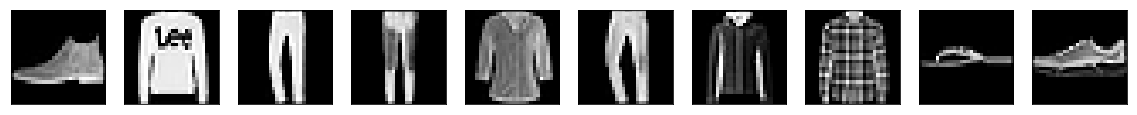

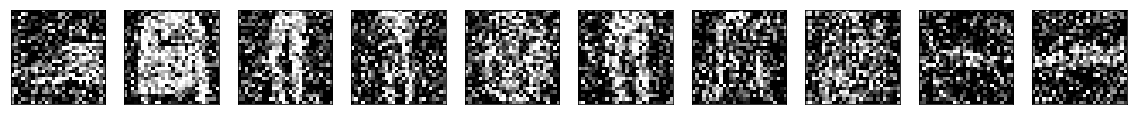

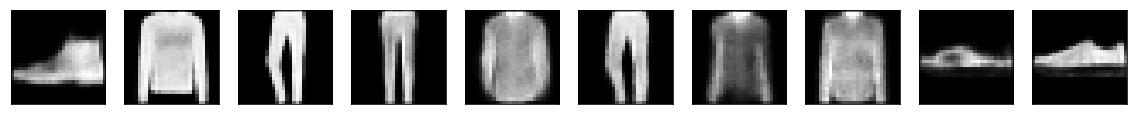

In [143]:
# NOTE: you don't need to change this code, just run it after having trained the DAE
def plot_examples(x):
    n = 10
    plt.figure(figsize=(20, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        plt.imshow(x[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

x_test_reconstr = dae.predict(x_test_noisy, batch_size=batch_size)

plot_examples(x_test)
plot_examples(x_test_noisy)
plot_examples(x_test_reconstr)

**c)** Do you consider the results acceptable? Do you think they can be useful for image retrieval? Explain why in one or two sentences.

**Answer:**

*=== write your answer here ===*
Yes, the image retrieval seems very noise resistant. We are able to identify the outlines of the items. The 7th jacket intialy almost bleds in with the background. Its retrieved item showing an even easier to define shape. We do lose the details of the items, such as the clothing patern. Also it is hard to identify which label an retrieved top should be given: t-shirts/tops , pullovers, coat.

***

**d)** Why can we train on the full dataset `x_train` here, whereas in Tasks 2.1 and 2.2 we had to use `x_train_l` (the first 5 classes only) for training?

**Answer:**

*=== write your answer here ===*

***

### Task 2.4: Fashion neural retrieval #4
Autoencoders come in different shapes and sizes. One key defining property of autoencoders is the means the model uses to prevent the learning of the identity function. Typically, this is done with different regularization methods. In the previous task you used a model that uses noise as a regularizer. In this task you will develop a Sparse Autoencoder (SAE). A sparse autoencoder uses a sparsity regularization to obtain sparse representations of the input data. Sparsity can be achieved by using L1-regularization on the activations of the hidden "code" layer.

**a)** Design a (convolutional) Sparse Autoencoder (SAE) for the *full* Fashion-MNIST dataset (i.e. use `x_train`, *not* `x_train_l`). For the encoder, use only Convolutional layers and Max-Pooling, followed by a Dense layer with 128 units. The output of this layer will be the "code" of the autoencoder (*HINT: you can use* `name="neural_codes"` *for this layer to make it easier to obtain features from it later*). Add an activity regularizer to this layer, using `regularizers.l1(10e-5)` from Keras.
For the decoder, start with a Dense layer to upscale to a suitable dimension, and then use only Convolutional layers and UpSampling. You may use BatchNormalization to speed up training.

Train the SAE to reconstruct input images. Make sure that it achieves a loss value of at most 0.31 on the test set (show this!). Save the trained model to a ".h5" file. (make sure you're using Keras version 2.1.3!)

In [71]:
# import regularizers for sparse autoencoder
from keras import regularizers

In [145]:
# define autoencoder
sae = Sequential()

# === SOLUTION: ===
# insert code here
#encoding
sae.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28,28,1)))
sae.add(MaxPooling2D((2, 2)))
sae.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
sae.add(MaxPooling2D((2, 2)))
sae.add(Flatten())
sae.add(Dense(128, activation='relu', activity_regularizer=regularizers.l1(10e-5)))


#decoding
sae.add(Dense(1568))#6272))
sae.add(Reshape((7,7,32)))
sae.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
sae.add(UpSampling2D((2, 2)))
sae.add(BatchNormalization())
sae.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
sae.add(UpSampling2D((2, 2)))
sae.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

sae.summary()
sae.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_149 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_41 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_67 (Dense)             (None, 128)               200832    
_________________________________________________________________
dense_68 (Dense)             (None, 1568)              202272    
__________

In [146]:
batch_size = 100
epochs = 1

sae.fit(x_train, x_train,
                batch_size=batch_size,
                epochs=epochs)

Epoch 1/1
60000/60000 [==============================] - 299s 5ms/step - loss: 0.3106 - acc: 0.5036


In [ ]:
# save the model
sae.save(os.path.join("assignment2_models", "sae_fashionmnist.h5"))

***

**b)** Briefly motivate how and why you chose this architecture.

**Answer:**

*=== write your answer here ===*

***

Visualise a few test examples and their reconstructions.

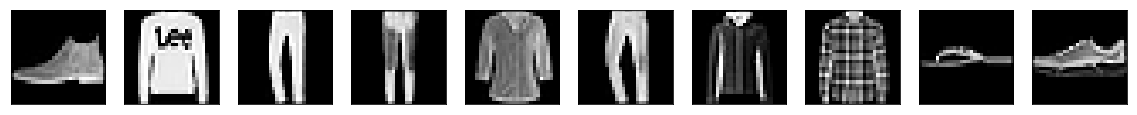

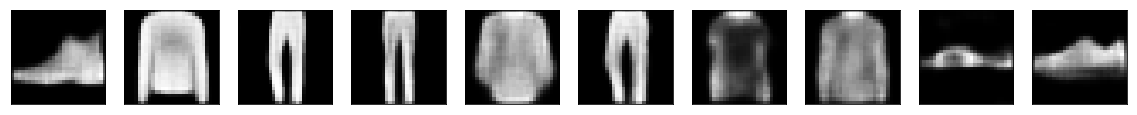

In [147]:
# NOTE: you don't need to change this code, just run it after having trained the SAE
def plot_examples(x):
    n = 10
    plt.figure(figsize=(20, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        plt.imshow(x[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

x_test_reconstr = sae.predict(x_test, batch_size=batch_size)

plot_examples(x_test)
plot_examples(x_test_reconstr)

**c)** Compare the visual results to those of the DAE in Task 2.3. Also compare the loss values of the test set for the DAE and SAE. How can you explain the difference?

**Answer:**

*=== write your answer here ===*

***

### Task 2.5: Comparison
Obtain 128-dimensional neural code representations of the last five classes of the Fashion-MNIST dataset (the *retrieval set*: `x_train_r`) from the following models/layers:
1. The last dense hidden layer (before the output layer) of the MLP you trained in Task 2.1
2. The last dense hidden layer (before the output layer) of the CNN you trained in Task 2.2
3. The center layer/code of the DAE you trained in Task 2.3
4. The center layer/code of the SAE you trained in Task 2.4
5. A PCA-transformation

In [ ]:
# additional imports
from keras.models import load_model
from keras.models import Model

In [ ]:
# load the previously trained and saved models
mlp = load_model(os.path.join("assignment2_models", "mlp_fashionmnist_l.h5"))
cnn = load_model(os.path.join("assignment2_models", "cnn_fashionmnist_l.h5"))
dae = load_model(os.path.join("assignment2_models", "dae_fashionmnist.h5"))
sae = load_model(os.path.join("assignment2_models", "sae_fashionmnist.h5"))
    
# NOTE: change the name "neural codes" if the layer from which you wish to retrieve neural codes has a different name
mlp_nc = Model(inputs=mlp.input, outputs=mlp.get_layer("neural_codes").output)
cnn_nc = Model(inputs=cnn.input, outputs=cnn.get_layer("neural_codes").output)
dae_nc = Model(inputs=dae.input, outputs=dae.get_layer("neural_codes").output)
sae_nc = Model(inputs=sae.input, outputs=sae.get_layer("neural_codes").output)

# obtain flat representations of the data
x_train_r_flat = x_train_r.reshape((x_train_r.shape[0], -1))
x_test_r_flat = x_test_r.reshape((x_test_r.shape[0], -1))

# train PCA on the retrieval set
pca = PCA(n_components=128)
pca.fit(x_train_r_flat)

# obtain 128-dimensional representations
nc_mlp_train = mlp_nc.predict(x_train_r)
nc_mlp_test = mlp_nc.predict(x_test_r)
nc_cnn_train = cnn_nc.predict(x_train_r)
nc_cnn_test = cnn_nc.predict(x_test_r)
nc_dae_train = dae_nc.predict(x_train_r)
nc_dae_test = dae_nc.predict(x_test_r)
nc_sae_train = sae_nc.predict(x_train_r)
nc_sae_test = sae_nc.predict(x_test_r)
nc_pca_train = pca.transform(x_train_r_flat)
nc_pca_test = pca.transform(x_test_r_flat)

# print the shapes to confirm all features are 128-dimensional
print(nc_mlp_train.shape)
print(nc_mlp_test.shape)
print(nc_cnn_train.shape)
print(nc_cnn_test.shape)
print(nc_dae_train.shape)
print(nc_dae_test.shape)
print(nc_sae_train.shape)
print(nc_sae_test.shape)
print(nc_pca_train.shape)
print(nc_pca_test.shape)

***

**a)** Evaluate the retrieval task as described in Question 1 on the last 5 classes (the retrieval set) of the Fashion-MNIST dataset, for the five data representations given above. Use query images from the test set and retrieve images from the training set only. Print the five resulting retrieval scores (between 0 and 5).

*HINT: you can use* `y_train_digits_r` *and* `y_test_digits_r` *to obtain digit encodings (as opposed to one-hot encodings) of the data labels.*

In [ ]:
# make random selection of n query images/indices, the same for all experiments
n = 200
n_examples = 5000  # the retrieval test set has 5000 images
indices = np.random.choice(range(n_examples), size=n, replace=False)

representations = [
    (nc_mlp_train, nc_mlp_test),
    (nc_cnn_train, nc_cnn_test),
    (nc_dae_train, nc_dae_test),
    (nc_sae_train, nc_sae_test),
    (nc_pca_train, nc_pca_test),
]
for (nc_train, nc_test) in representations:
    # === SOLUTION: ===
    # insert code here

***

**b)** Compare the "baseline" PCA-transformed data with the other methods. Is PCA a suitable method to obtain representations for image retrieval in this situation? Why do you think so? Would you expect a similar conclusion for the Caltech101 dataset from Question 1?

**Answer:**

*=== write your answer here ===*

***

Observe the difference between encodings from the DAE and SAE.

In [ ]:
print("Mean activation for DAE encodings:", np.mean(nc_dae_train))
print("Mean activation for SAE encodings:", np.mean(nc_sae_train))

index = 1  # try a few indices here
print("DAE encoding example:")
print(nc_dae_train[index])
print("SAE encoding example:")
print(nc_sae_train[index])

**c)** Discuss the difference in encodings between the two autoencoders (denoising and sparse). Also discuss the difference in retrieval performance for these encodings. How would you explain this difference?

**Answer:**

*=== write your answer here ===*

***

**d)** What is the best performing method you found in part a)? Describe what advantage you believe this method has over the others.

**Answer:**

*=== write your answer here ===*